## Задание
Пользуясь новыми знаниями, проведите эксплоративный анализ данных на данных недвижимости Бостона, и попытайтесь обучить линейную модель наиболее качественно. Все ваши действия и решения описывайте в markdown.
Переменная, которую надо предсказать - ’MEDV’.
Если вы неудовлетворенны результатом, но лучшего решения предложить не можете, то высылайте задание на проверку.
Цель задания - закрепить полученные навыки.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# указанный код в задании у меня не работал
from sklearn.datasets import load_boston
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Содержит информацию о жилье в Бостоне, собранную бюро переписи населения США. 

- CRIM - уровень преступности на душу населения
- ZN - доля земли под жилую застройку,
- INDUS - доля акров, не относящихся к розничной торговле.
- CHAS - фиктивная переменная реки Чарльз (1, если участок ограничивает реку; 0 в противном случае)
- NOX - концентрация оксидов азота 
- RM - среднее количество комнат в доме
- AGE - доля занимаемых владельцами единиц, построенных до 1940 г.
- DIS - взвешенное расстояние до пяти бостонских центров занятости
- RAD - индекс доступности радиальных автомобильных дорог
- TAX - полная ставка налога на имущество за 10 000 долларов США.
- PTRATIO - соотношение учеников и учителей по городам
- B - 1000 (Bk - 0,63) ^ 2, где Bk - доля афроамериканцев по городам
- LSTAT - % более населения низкого соц статуса
- MEDV - Средняя стоимость домов в 1000 долларов

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Имеем 506 строк и 14 столбцов, пропущенных значений нет, все данные числовые и уникальные

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
for col in df.columns:
  missing = np.mean(df[col].isnull())
  print(f'{col} - {round(missing * 100)}%')

CRIM - 0%
ZN - 0%
INDUS - 0%
CHAS - 0%
NOX - 0%
RM - 0%
AGE - 0%
DIS - 0%
RAD - 0%
TAX - 0%
PTRATIO - 0%
B - 0%
LSTAT - 0%
MEDV - 0%


In [ ]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

In [ ]:
df.shape

(506, 14)

Функция линенйной регресии для тестирования  качества

---
Возьмем 0.2 для тестовой проверки т.к. данных немного


In [ ]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = ['MEDV']

In [ ]:
get_score(df[cols], df[target])

0.668759493535633

Модель на этих данных обучается не важно 

Посмотрим на распределение целевой переменной

---
Есть несколько небольших выбросов


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


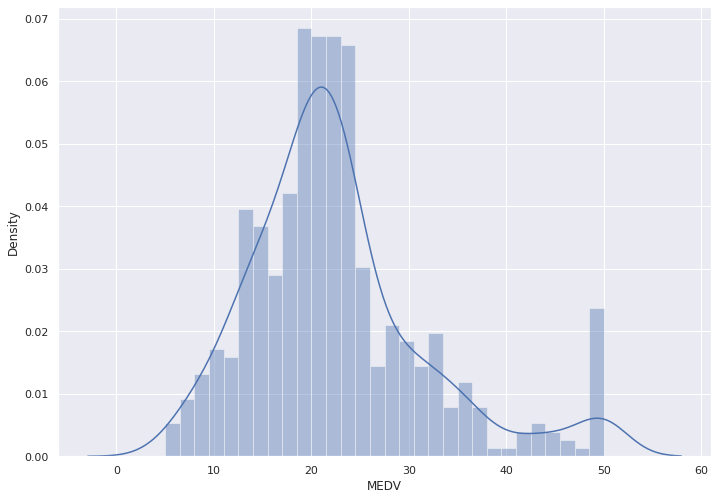

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

Посмотрим на тепловую карту, насколько сильно коррелируют значения

---

Уровень преступности не коррелирует со стоймостью (это странно), но все равно оставим эти данные. CHAS фиктивная переменная и она не нужна. NOX тоже оставим(хотя спрос на чистый воздух до 40х был небольшим). AGE, RM, DIS, ZN, RAD, TAX, LSTAT,INDUS, B(доля проживающих чернокожих), PTRATIO оставим. 

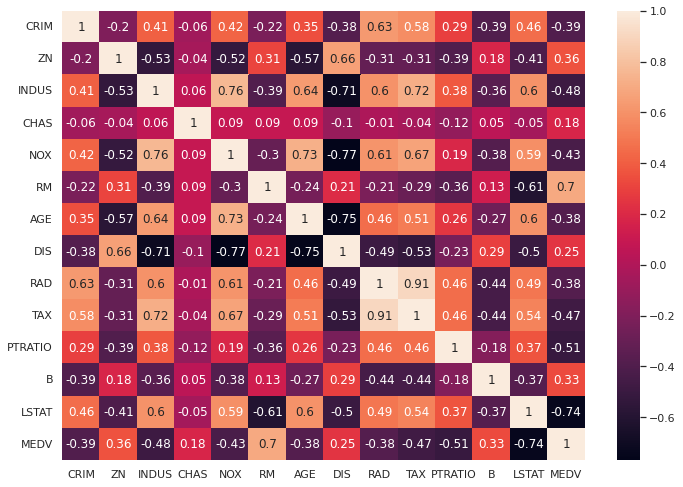

In [ ]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Построим боксплоты

---
Есть выбросы, в колонке "В" очень длинный хвост,но, возможно, в то время был большой % афроамериканцев, в колонке "CRIM" выбросы вызывают вопросы


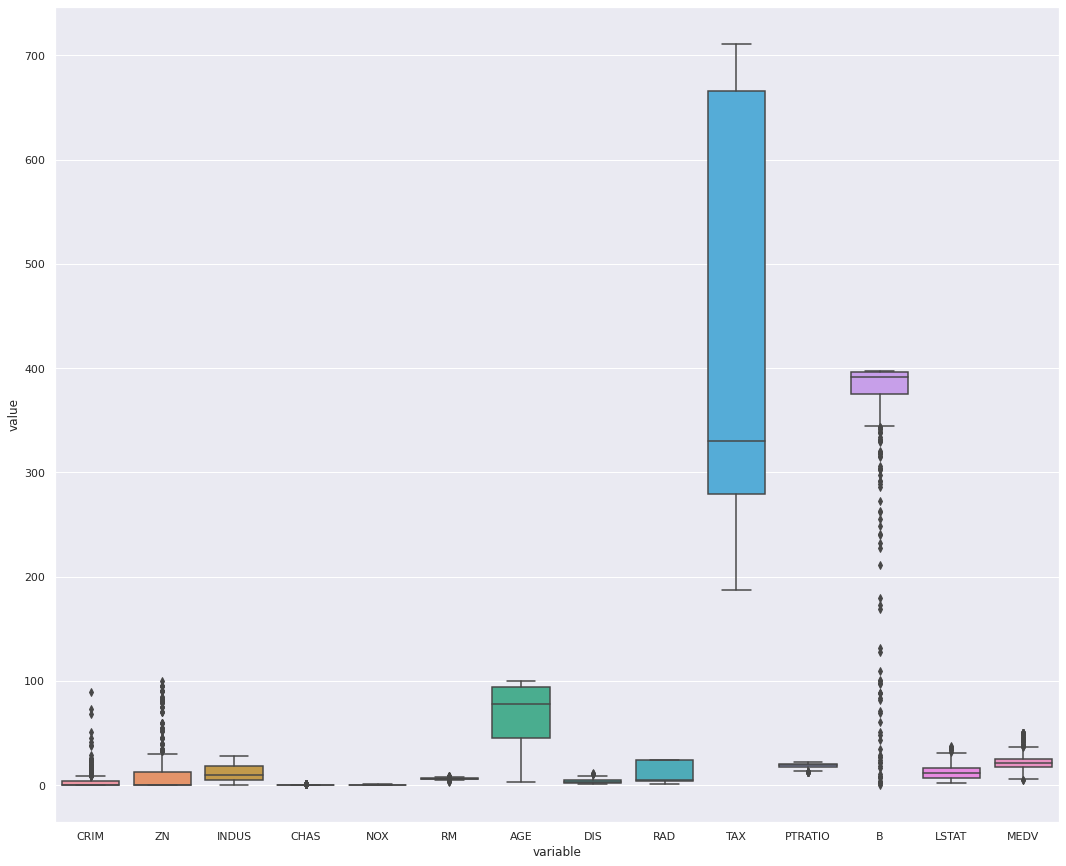

In [ ]:
plt.figure(figsize = (18,15))
sns.boxplot(x = "variable",
            y = "value", 
            data = pd.melt(df))

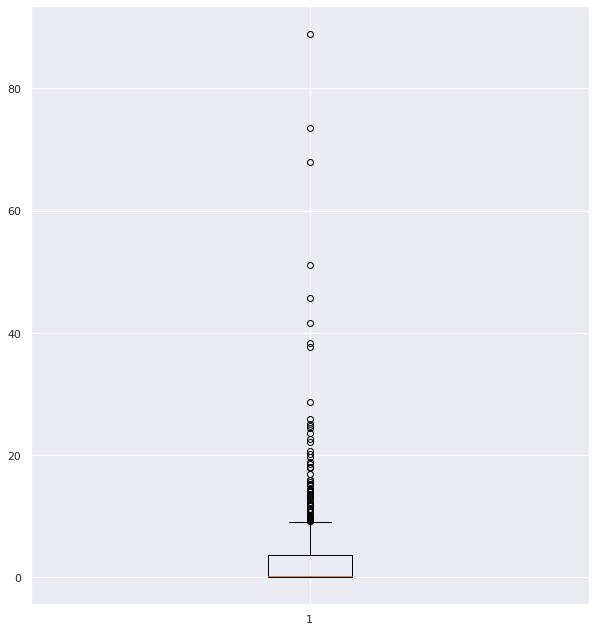

In [ ]:
plt.figure(figsize = (10,11))
plt.boxplot(df['CRIM'])
plt.show()

Больше 30 преступлений на душу, как-то многовато

---

Посмотрим на них


In [ ]:
df[df['CRIM'] > 30]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21,10.4
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38,8.5
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98,5.0
410,51.1358,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0
418,73.5341,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62,8.8
427,37.6619,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52,10.9


Значения кажется мне очень странными,имею высокий налог, находятся в промышленной зоне при этом высокое соотношение учеников и учителей, возможно их лучше убрать

In [ ]:
df_cd = df.drop(df[df['CRIM'] > 30].index)
df_cd

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Было 0.668, модель обучилась почти  на 9% лучше

In [ ]:
get_score(df_cd[cols], df_cd[target])

0.7564786813945156

Построим график зависимости между возрастом здания и ценой

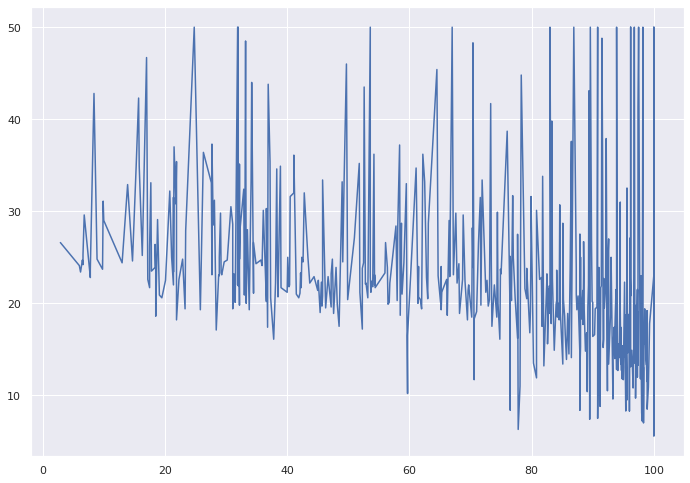

In [ ]:
plt.plot(df_cd.sort_values('AGE').AGE, df_cd.sort_values('AGE').MEDV)

Закодируем их по десятилетиям и уберем колонку AGE

In [ ]:
df_cd['10_AGE'] = df_cd['AGE'] // 10
df_cd['10_AGE'].value_counts()

9.0     126
8.0      69
7.0      46
3.0      44
4.0      39
10.0     38
5.0      38
6.0      34
2.0      30
1.0      21
0.0      13
Name: 10_AGE, dtype: int64

In [ ]:
def get_one_hot(X, cols):
    for each in cols:
        dummies = pd.get_dummies(X[each], prefix=each, drop_first=False)
        X = pd.concat([X, dummies], axis=1)
    return X

In [ ]:
df_cd = get_one_hot(df_cd, ['10_AGE'])

In [ ]:
df_cd.drop(columns=['AGE'], inplace = True)

In [ ]:
df_cd.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,10_AGE,10_AGE_0.0,10_AGE_1.0,10_AGE_2.0,10_AGE_3.0,10_AGE_4.0,10_AGE_5.0,10_AGE_6.0,10_AGE_7.0,10_AGE_8.0,10_AGE_9.0,10_AGE_10.0
0,0.00632,18.0,2.31,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,6.0,0,0,0,0,0,0,1,0,0,0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,7.0,0,0,0,0,0,0,0,1,0,0,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,6.0,0,0,0,0,0,0,1,0,0,0,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,4.0,0,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,5.0,0,0,0,0,0,1,0,0,0,0,0
5,0.02985,0.0,2.18,0.0,0.458,6.430,6.0622,3.0,222.0,18.7,394.12,5.21,28.7,5.0,0,0,0,0,0,1,0,0,0,0,0
6,0.08829,12.5,7.87,0.0,0.524,6.012,5.5605,5.0,311.0,15.2,395.60,12.43,22.9,6.0,0,0,0,0,0,0,1,0,0,0,0
7,0.14455,12.5,7.87,0.0,0.524,6.172,5.9505,5.0,311.0,15.2,396.90,19.15,27.1,9.0,0,0,0,0,0,0,0,0,0,1,0
8,0.21124,12.5,7.87,0.0,0.524,5.631,6.0821,5.0,311.0,15.2,386.63,29.93,16.5,10.0,0,0,0,0,0,0,0,0,0,0,1
9,0.17004,12.5,7.87,0.0,0.524,6.004,6.5921,5.0,311.0,15.2,386.71,17.10,18.9,8.0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_cd.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', '10_AGE', '10_AGE_0.0', '10_AGE_1.0',
       '10_AGE_2.0', '10_AGE_3.0', '10_AGE_4.0', '10_AGE_5.0', '10_AGE_6.0',
       '10_AGE_7.0', '10_AGE_8.0', '10_AGE_9.0', '10_AGE_10.0'],
      dtype='object')

In [ ]:
cols2 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', '10_AGE', '10_AGE_0.0', '10_AGE_1.0',
       '10_AGE_2.0', '10_AGE_3.0', '10_AGE_4.0', '10_AGE_5.0', '10_AGE_6.0',
       '10_AGE_7.0', '10_AGE_8.0', '10_AGE_9.0', '10_AGE_10.0']

get_score(df_cd[cols2], df_cd['MEDV'])

1.0